In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
## generate an image

In [72]:
def load_image():
    image = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(image, 'ABCDE', (100,200), font, 4, (255,255,189), 25)
    # plt.imshow(image)
    return image

In [73]:
image = load_image()

In [74]:
def display_image(image):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap='gray')

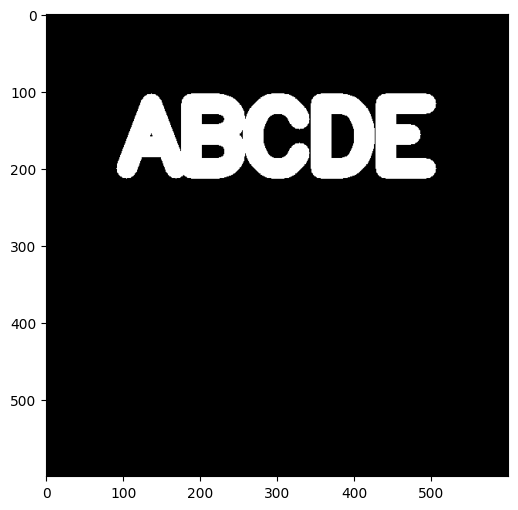

In [75]:
display_image(image)

In [38]:
### let'd so erosion to remove the forground contacts

In [39]:
## prepare a kernel which will be used in Erosion technique

In [40]:
kernel = np.ones((5,5), dtype=np.uint8)

In [41]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [76]:
erosion_image = cv2.erode(src=image,kernel=kernel, iterations=5)

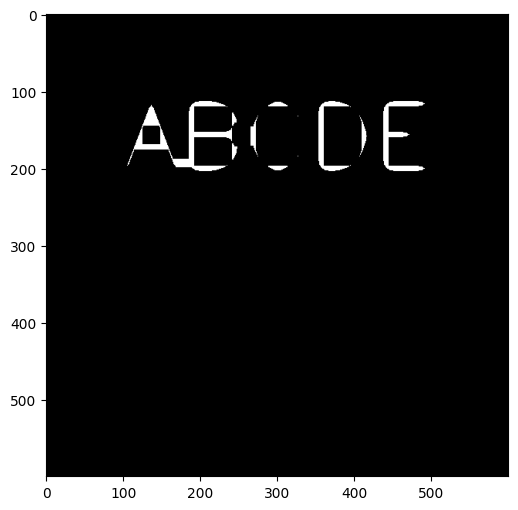

In [77]:
display_image(erosion_image)

### Opening operation - used when it is required to remove the background noise

In [139]:
image = load_image()

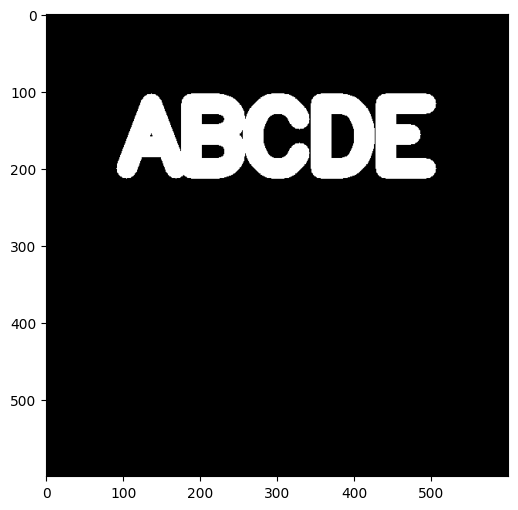

In [140]:
display_image(image)

In [141]:
image.shape

(600, 600)

In [55]:
image.max()

255.0

In [57]:
image.min()

0.0

##### Creating a noise image to be added in the original image

In [142]:
noise = np.random.randint(low=0,high=255,size=(600,600))

In [82]:
noise.shape

(600, 600)

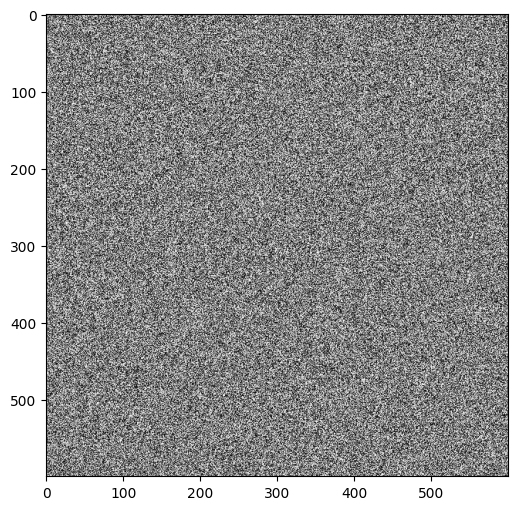

In [143]:
display_image(noise)

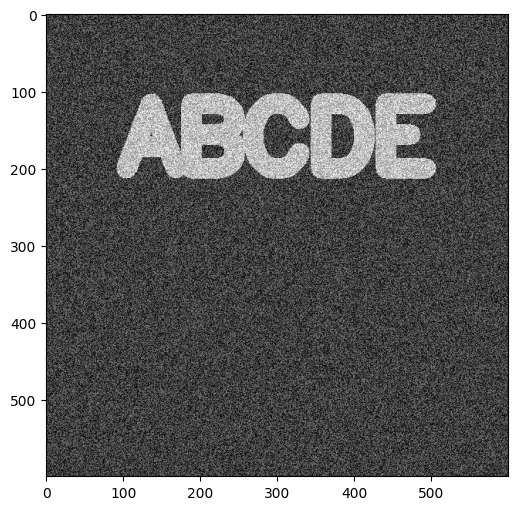

In [144]:
noisy_image = image + noise
display_image(noisy_image)

In [149]:
bg_noise_removed_image = cv2.morphologyEx(src=noisy_image,op=cv2.MORPH_OPEN, kernel=kernel, iterations=4)

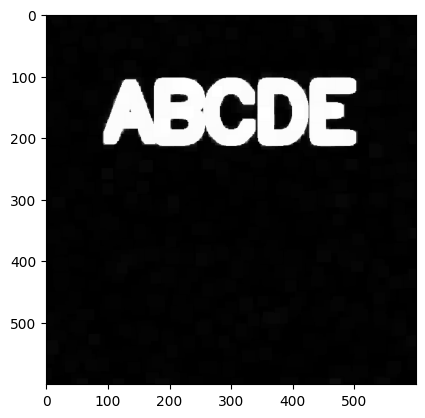

In [151]:
# display_image(bg_noise_removed_image)
plt.imshow(bg_noise_removed_image, cmap='gray')

### Closing operation to remove the noise from the foreground

In [94]:
image = load_image()

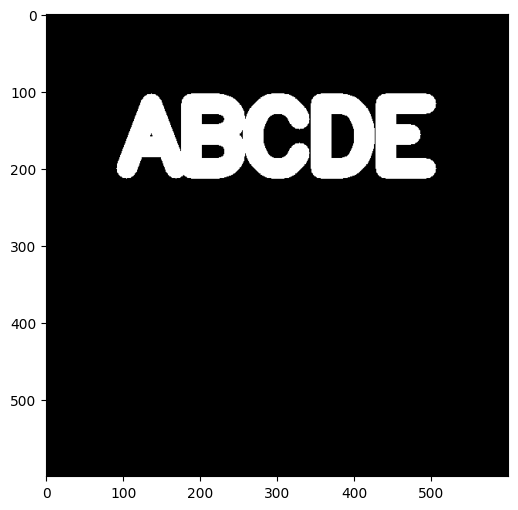

In [95]:
display_image(image)

In [127]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise = black_noise * -255

In [122]:
noisy_image = black_noise + image
print(noisy_image)
noisy_image[noisy_image == -255] = 0

[[-255.    0.    0. ...    0. -255. -255.]
 [   0. -255. -255. ... -255.    0. -255.]
 [   0.    0. -255. ...    0.    0. -255.]
 ...
 [-255.    0.    0. ... -255. -255. -255.]
 [-255. -255.    0. ...    0.    0. -255.]
 [-255.    0.    0. ...    0.    0.    0.]]


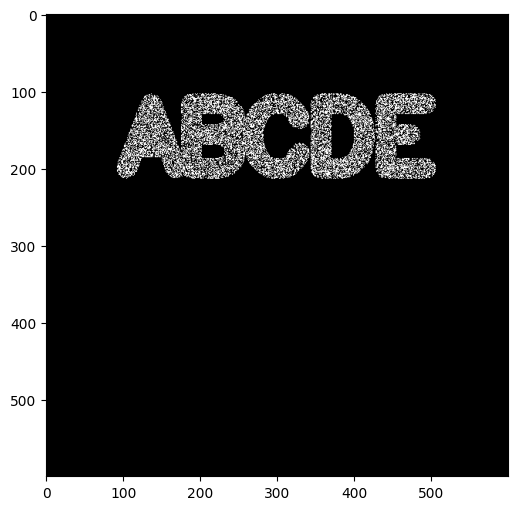

In [111]:
display_image(noisy_image)

In [114]:
fg_noise_removed_image = cv2.morphologyEx(noisy_image,cv2.MORPH_CLOSE, kernel)

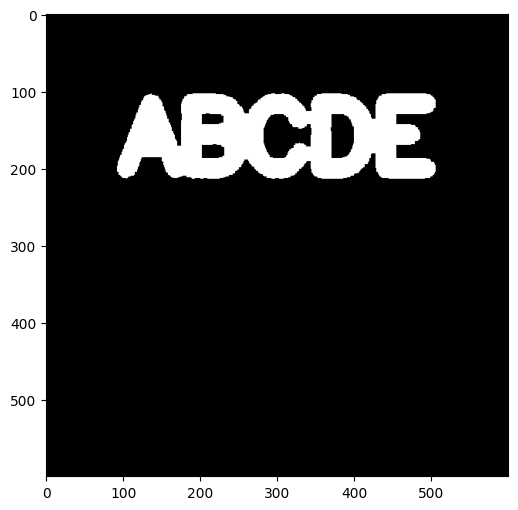

In [115]:
display_image(fg_noise_removed_image)

In [128]:
### Morphological Gradient is the differnce between the erosion & dilation

In [130]:
image = load_image()

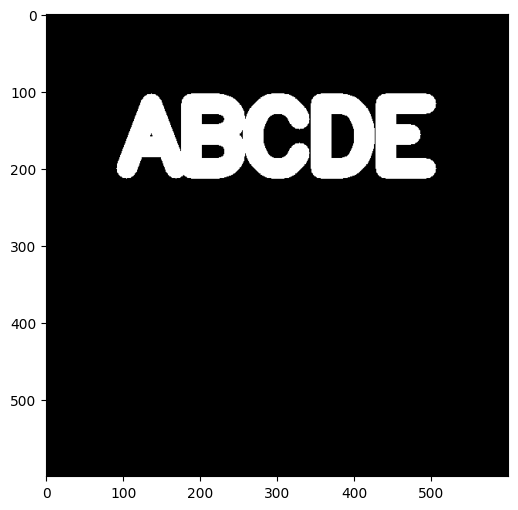

In [131]:
display_image(image)

In [132]:
gradient_image = cv2.morphologyEx(src=image, op=cv2.MORPH_GRADIENT, kernel = kernel)

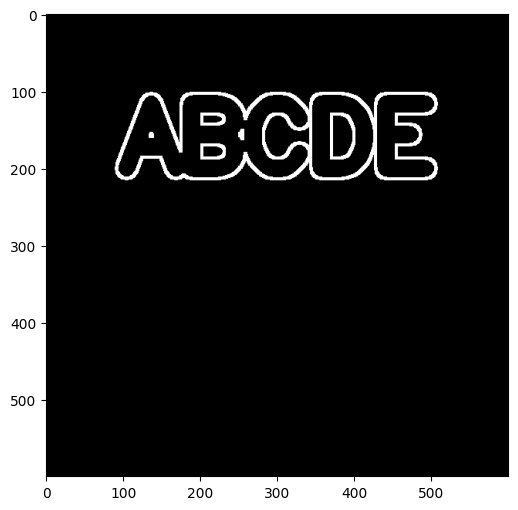

In [133]:
display_image(gradient_image)

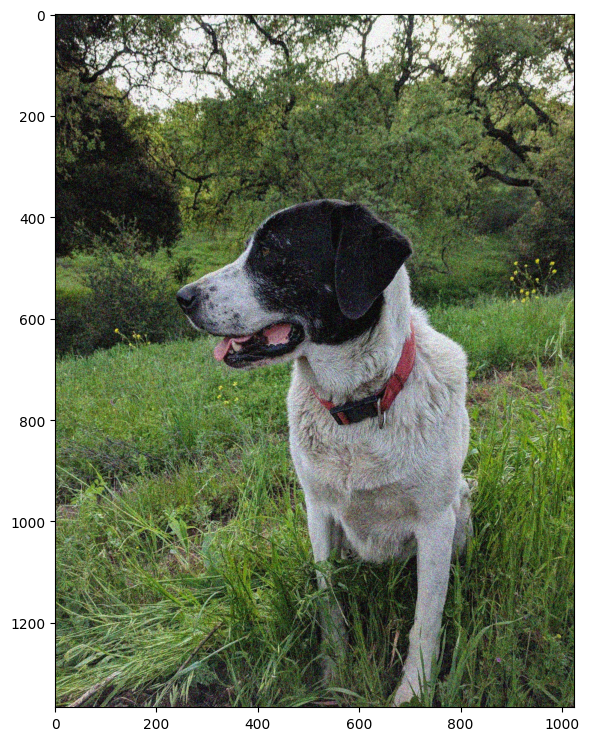

In [153]:
image = cv2.imread('sammy_noise.jpg')

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.imshow(image)

In [167]:
sammy_noise_removed = cv2.morphologyEx(image, cv2.MORPH_DILATE, kernel, iterations=2)

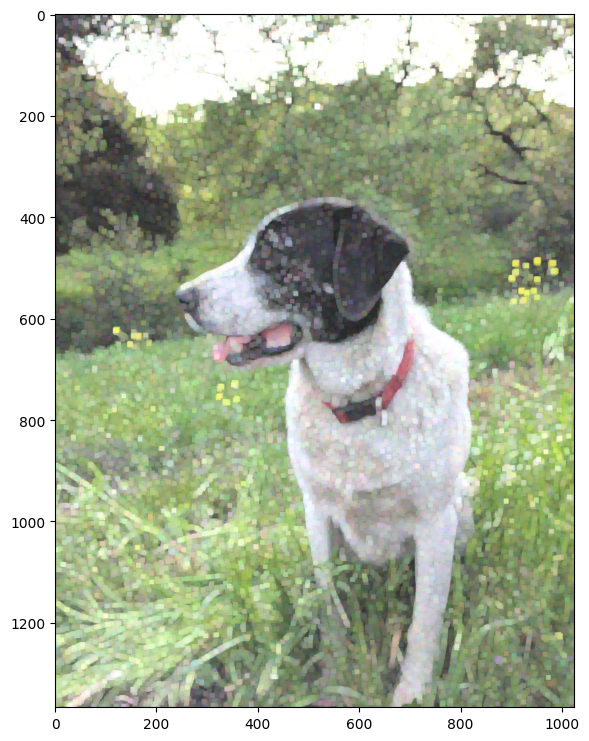

In [168]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.imshow(sammy_noise_removed)